In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description

In [35]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [36]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Question 0 (Example)
How many features does the breast cancer dataset have?

This function should return an integer.

In [37]:

# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero()

30

In [38]:
columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
            'mean smoothness', 'mean compactness', 'mean concavity',
            'mean concave points', 'mean symmetry', 'mean fractal dimension',
            'radius error', 'texture error', 'perimeter error', 'area error',
            'smoothness error', 'compactness error', 'concavity error',
            'concave points error', 'symmetry error', 'fractal dimension error',
            'worst radius', 'worst texture', 'worst perimeter', 'worst area',
            'worst smoothness', 'worst compactness', 'worst concavity',
            'worst concave points', 'worst symmetry', 'worst fractal dimension',
            'target']

index = pd.RangeIndex(start=0, stop=569, step=1)

In [66]:
def answer_one():
    
    # Your code here
    
    df = pd.DataFrame(columns=columns,
                      index=index,
                      data = np.column_stack((cancer.data, cancer.target)))
    
    return df
answer_one().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [115]:
from collections import namedtuple
def answer_two():
    cancerdf = answer_one()
    # Your code here
    
    cancer_data = namedtuple('cancer_data', 'benign malignant')
    
    data = cancer_data(len(cancer.target)-sum(cancer.target),
                      sum(cancer.target))
    result= pd.Series(index=cancer.target_names, data= data)
    return result

answer_two()



malignant    212
benign       357
dtype: int64

In [130]:
def answer_three():
    cancerdf = answer_one()
    
    # Your code here
    X = cancerdf[cancerdf.columns[:-1]]
    y = cancerdf.target
    
    return (X, y)
answer_three()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0         17.990         10.38          122.80     1001.0          0.11840   
 1         20.570         17.77          132.90     1326.0          0.08474   
 2         19.690         21.25          130.00     1203.0          0.10960   
 3         11.420         20.38           77.58      386.1          0.14250   
 4         20.290         14.34          135.10     1297.0          0.10030   
 5         12.450         15.70           82.57      477.1          0.12780   
 6         18.250         19.98          119.60     1040.0          0.09463   
 7         13.710         20.83           90.20      577.9          0.11890   
 8         13.000         21.82           87.50      519.8          0.12730   
 9         12.460         24.04           83.97      475.9          0.11860   
 10        16.020         23.24          102.70      797.8          0.08206   
 11        15.780         17.89          103.60     

In [140]:

from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=426, test_size=143)
    return X_train, X_test, y_train, y_test
answer_four()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 107       12.360         18.54           79.01      466.7          0.08477   
 485       12.450         16.41           82.85      476.7          0.09514   
 300       19.530         18.90          129.50     1217.0          0.11500   
 308       13.500         12.71           85.69      566.2          0.07376   
 482       13.470         14.06           87.32      546.3          0.10710   
 280       19.160         26.60          126.20     1138.0          0.10200   
 443       10.570         18.32           66.82      340.9          0.08142   
 230       17.050         19.08          113.40      895.0          0.11410   
 491       17.850         13.23          114.60      992.1          0.07838   
 63         9.173         13.86           59.20      260.9          0.07721   
 345       10.260         14.71           66.20      321.6          0.09882   
 527       12.340         12.27           78.94     

In [146]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    return classifier
answer_five()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [163]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    return answer_five().predict(means)
answer_six()

array([1.])

In [173]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five().predict(X_test)
    
    # Your code here
    
    return knn
len(answer_seven())

143

In [174]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    knn.score(X_test, y_test)
    # Your code here
    
    return knn.score(X_test, y_test)
answer_eight()

0.993006993006993

In [177]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)


<IPython.core.display.Javascript object>


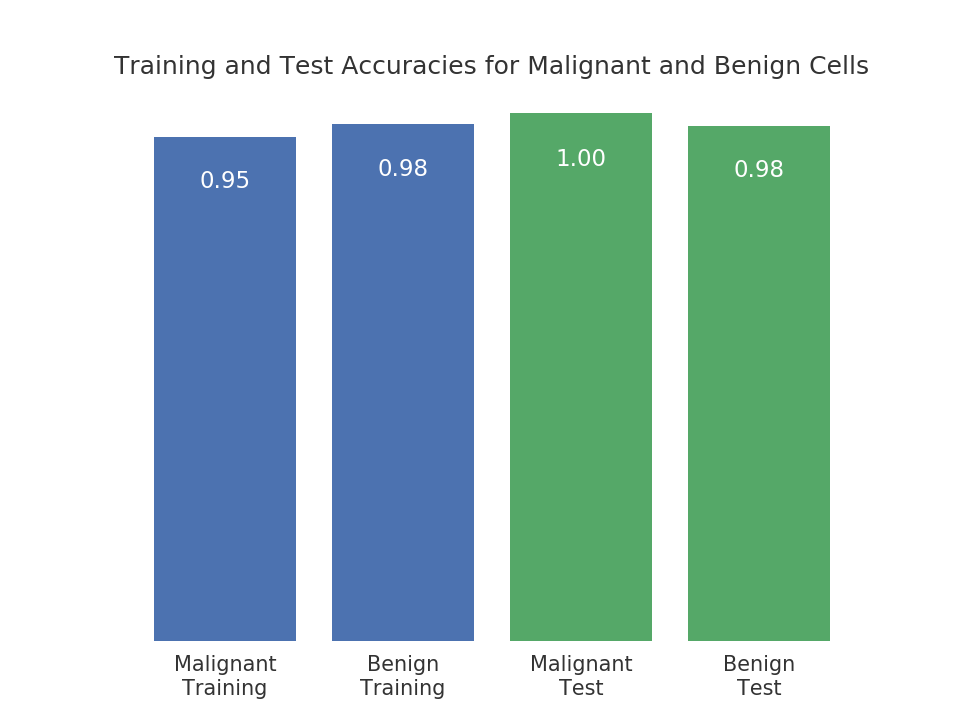

C:\Users\Marceli\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [178]:
# Uncomment the plotting function to see the visualization, 
# Comment out the plotting function when submitting your notebook for grading

accuracy_plot()